### CA7 for Atmospheric Thermodynamic


### Import packages and set perameters

In [101]:
import Mog
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#H,P,T,RH = np.loadtxt(fname='46810-2018072200.edt.txt',dtype=float,usecols=(1,2,3,4),skiprows=3,delimiter=',',unpack=True)
Gamma_d = Mog.g0/Mog.Cp  # Dry adiabatic lapse rate [K/m]


## CA7-1 Mountain Climbing

Target:

        1. Tc 
        2. hm/Cp, Sd/Cp, T, qv

Initial:

        T = 27 [°C]
        RH = 75 [%]

*Assume that qv is const in PBL*

#### Point 1: (22m) And find cloud base (592.2m)

H = 22 [m]; P = 1001.4 [hPa]

In [102]:
# Initial values (T, RH) @ 22m
T_1 = 27  # °C
T_K1 = 27 + 273.15  # K
RH = 0.75  # Relative Humidity
P = 1001.4  # hPa

# e and qv @ 22m
es_1 = Mog.SaturationWaterVaporPressure(T_K1)  # es @ 22m
qvs_1 = es_1 * Mog.epsilon / 1001.4  # qvs @ 22m
e_1 = es_1 * RH  # e @ 22m
qv_1 = qvs_1 * RH  # qv @ 22m

# Sd and hm
Sd_1 = Mog.Cp * T_K1 + Mog.g0 * 22  # Sd @ 22m
hm_1 = Mog.Cp * T_K1 + Mog.g0 * 22 + Mog.Lv * qv_1  # hm @ 22m

def f(Tc):
    # Set the values of the variables used in the function
    w = qv_1
    p0 = 1001.4
    T0 = T_K1
    ep = 0.622
    A = 2.53*10**9
    B = 5420
    kp = Mog.Cp/Mog.Rd
    # Calculate the value of the function and return it
    ans = Tc - B/np.log(((A*ep)/(w*p0))*(T0/Tc)**kp)
    return ans

# Calculating Tc and find cloud base
Tc = opt.bisect(f, 10, 400)
Cloudbase = (T_K1 - Tc)/Gamma_d

print('Tc =', Tc, '[K]')
print('Cloud base =', Cloudbase, '[m]')


Tc = 294.3652353475184 [K]
Cloud base = 592.2413577614662 [m]


#### Point 2 (cloud base = 592.2m, P = 938.8 hPa)

T = Tc ;    
qv = qv_1 @ cb

In [103]:
# Sd and hm @ cb
Sd_2 = Mog.Cp * Tc + Mog.g0 * Cloudbase  # Sd @ cb
hm_2 = Mog.Cp * Tc + Mog.g0 * Cloudbase + Mog.Lv * qv_1  # hm @ cb



#### Point 3 (2595m, P = 744 hPa) 

In [104]:
# T and qv
T_3 = 12.5
T_K3 = T_3 + 273.15
qvs_3 = 0.0123

# hm and Sd
Sd_3 = Mog.Cp * T_K3 + Mog.g0 * 2595  # Sd @ 2595m
hm_3 = Mog.Cp * T_K3 + Mog.g0 * 2595 + Mog.Lv * qvs_3  # hm @ 2595m


#### Point 4 (1500m, P = 846 hPa)

In [105]:
# T and qv
T_4 = 17.2
T_K4 = T_4 + 273.15
qvs_4 = 0.0147

# hm and Sd
Sd_4 = Mog.Cp * T_K4 + Mog.g0 * 1500
hm_4 = Mog.Cp * T_K4 + Mog.g0 * 1500 + Mog.Lv * qvs_4

#### Point 5 (3742m, P = 648 hPa)

In [106]:
# T and qv
T_5 = 7.2
T_K5 = T_5 + 273.15
qvs_5 = 0.01

# hm and Sd
Sd_5 = Mog.Cp * T_K5 + Mog.g0 * 3742
hm_5 = Mog.Cp * T_K5 + Mog.g0 * 3742 + Mog.Lv * qvs_5

#### Plot CA7-1

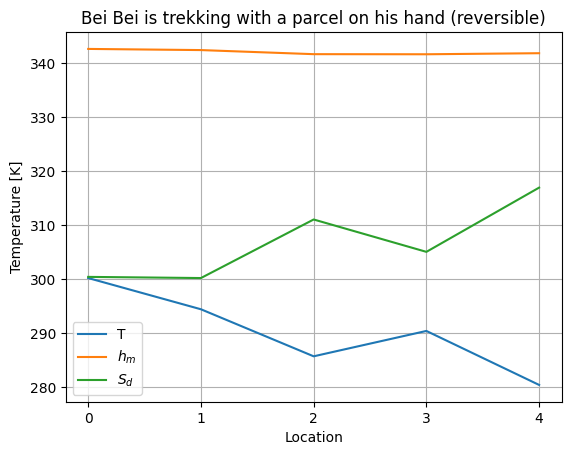

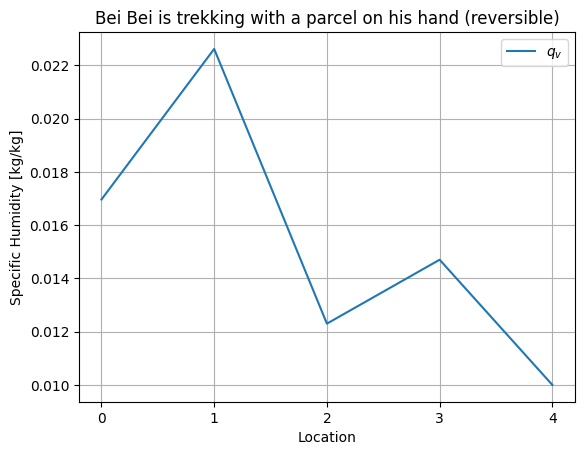

In [119]:
plt.plot([T_K1, Tc, T_K3, T_K4, T_K5])
plt.plot([hm_1/Mog.Cp, hm_2/Mog.Cp, hm_3/Mog.Cp, hm_4/Mog.Cp, hm_5/Mog.Cp])
plt.plot([Sd_1/Mog.Cp, Sd_2/Mog.Cp, Sd_3/Mog.Cp, Sd_4/Mog.Cp, Sd_5/Mog.Cp])
plt.legend(['T', '$h_m$', '$S_d$'])
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Location')
plt.ylabel('Temperature [K]')
plt.title('Bei Bei is trekking with a parcel on his hand (reversible)')
plt.grid()
plt.show()

plt.plot([qv_1, qvs_1, qvs_3, qvs_4, qvs_5])
plt.legend(['$q_v$'])
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Location')
plt.ylabel('Specific Humidity [kg/kg]')
plt.title('Bei Bei is trekking with a parcel on his hand (reversible)')
plt.grid()
plt.show()




## CA7-2